# Step 1 :  Import Library and Dataset

In [3]:
import pandas as pd
import numpy as np

In [4]:
import os 
os.chdir(r"C:\Users\cheta\Desktop\python\Machine learning Practise Projects\Decision tree") 

In [6]:
# Read the data in
wine = pd.read_csv(r"Wine quality.csv")

In [7]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [17]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [18]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


# Step 2 : Data Pre-Processing

### Checking missing values

In [19]:
# Do we have NA's in data
wine.isna().sum()  ## is = check & as = convert

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [20]:
wine.quality.value_counts(ascending=False)

good    855
bad     744
Name: quality, dtype: int64

<AxesSubplot:>

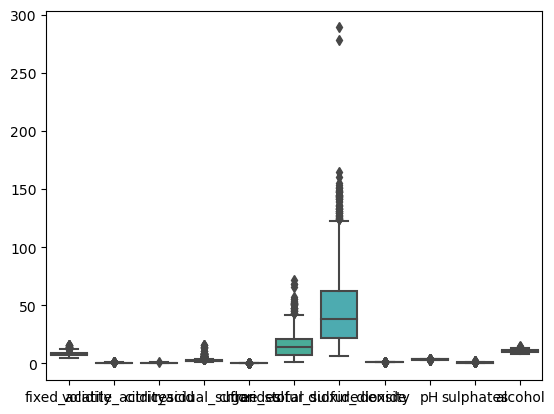

In [21]:
import seaborn as sns
sns.boxplot(data=wine)

# Quality Rate Analysis

In [22]:
wine.quality.value_counts()

good    855
bad     744
Name: quality, dtype: int64

In [23]:
855+744

1599

In [24]:
(744/1599)*100

46.52908067542214

In [25]:
import plotly.express as px

fig = px.pie(wine,names='quality',color='quality',
             color_discrete_map={'Yes':'red',
                                 'No':'green'})
fig.show()

### Taking subset data of Number 

In [26]:
wine.select_dtypes(include=[np.number]).columns.tolist()

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [27]:
# #Employee Numeric columns
wine_num = wine[wine.select_dtypes(include=[np.number]).columns.tolist()]
wine_num.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8


### Taking subset data of Category 

In [28]:
wine_dummies = wine[wine.select_dtypes(include=['object']).columns.tolist()]
wine_dummies.head(3)

,quality
0,bad
1,bad
2,bad


### Converting Quality Variable to Number

In [29]:
from sklearn.preprocessing import LabelEncoder
wine_dummies=wine_dummies.apply(LabelEncoder().fit_transform)
wine_dummies.head(3)
# label in ascending order

,quality
0,0
1,0
2,0


### Combine to Dataset

In [30]:
wine_combined = pd.concat([wine_num, wine_dummies],axis=1)

In [31]:
wine_combined.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


# Step 3: Data Partition

In [32]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
x = wine_combined.drop(['quality'],axis=1)
y = wine_combined[['quality']]

# Train test split

X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=231)

# Step 4: Model Building

In [33]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier()  # by default it use Gini index for split
#Train the model using the training sets
dt.fit(X_train,y_train)  # Model = dt

DecisionTreeClassifier()

# Step 5: Plotting the Tree 

In [34]:
train=pd.concat([y_train,X_train],axis=1)
train.head()

,quality,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
851,0,9.3,0.430,0.44,1.9,0.085,9.0,22.0,0.99708,3.28,0.55,9.5
642,0,9.9,0.540,0.45,2.3,0.071,16.0,40.0,0.99910,3.39,0.62,9.4
1464,0,6.8,0.590,0.10,1.7,0.063,34.0,53.0,0.99580,3.41,0.67,9.7
1348,0,7.2,0.655,0.03,1.8,0.078,7.0,12.0,0.99587,3.34,0.39,9.5
724,0,7.5,1.115,0.10,3.1,0.086,5.0,12.0,0.99580,3.54,0.60,11.2


In [35]:
independent_variable = list(train.columns[1:])
independent_variable

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

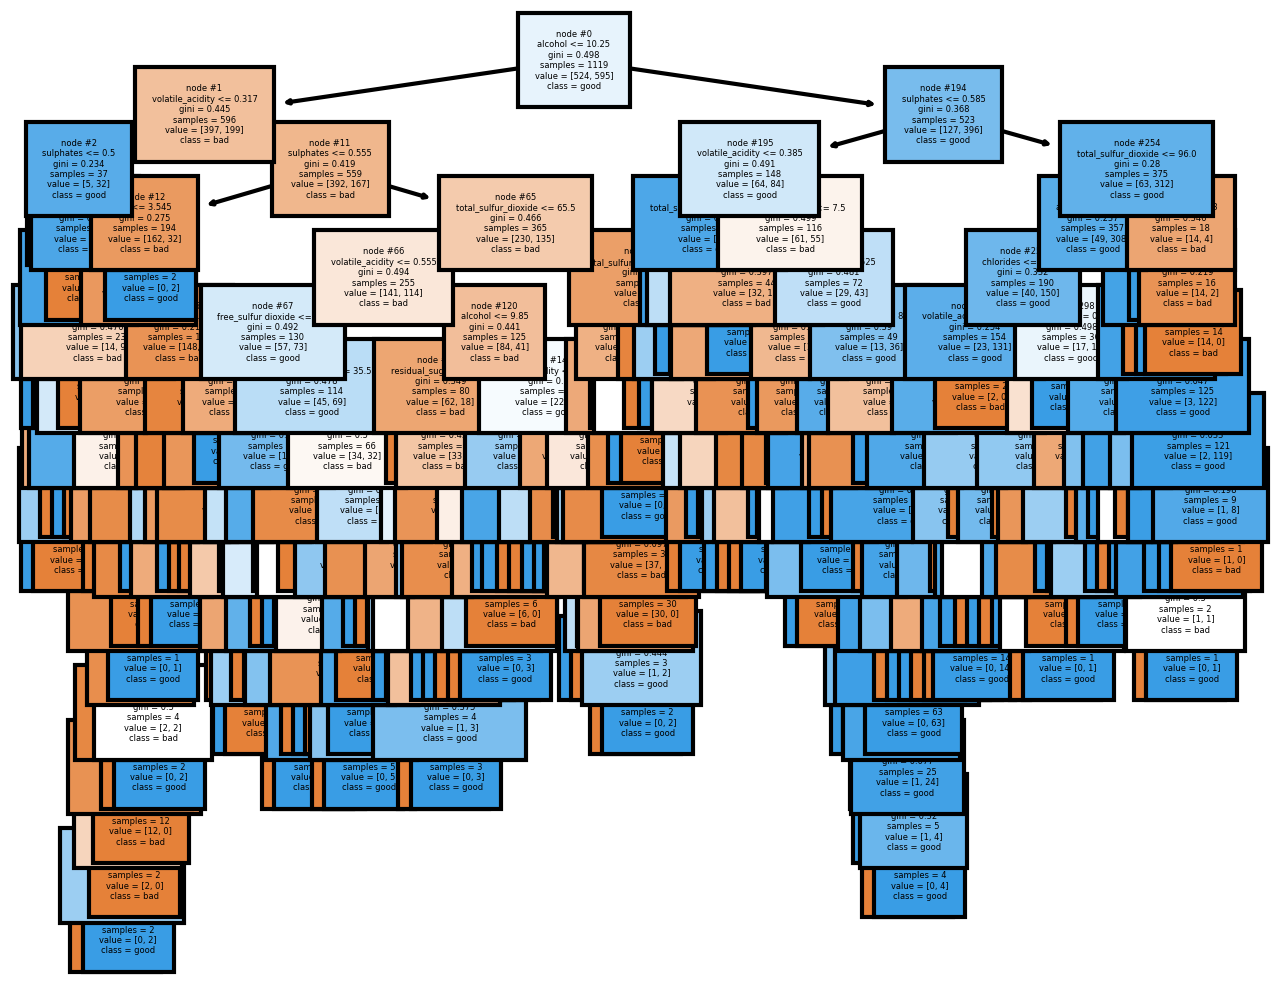

In [36]:
from sklearn import tree
import matplotlib.pyplot as plt

quality=['bad', 'good']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names=quality, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')

# Step 6 : Predictions on Train Dataset

In [37]:
train.head()

,quality,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
851,0,9.3,0.430,0.44,1.9,0.085,9.0,22.0,0.99708,3.28,0.55,9.5
642,0,9.9,0.540,0.45,2.3,0.071,16.0,40.0,0.99910,3.39,0.62,9.4
1464,0,6.8,0.590,0.10,1.7,0.063,34.0,53.0,0.99580,3.41,0.67,9.7
1348,0,7.2,0.655,0.03,1.8,0.078,7.0,12.0,0.99587,3.34,0.39,9.5
724,0,7.5,1.115,0.10,3.1,0.086,5.0,12.0,0.99580,3.54,0.60,11.2


In [38]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,quality,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Predicted
851,0,9.3,0.430,0.44,1.9,0.085,9.0,22.0,0.99708,3.28,0.55,9.5,0
642,0,9.9,0.540,0.45,2.3,0.071,16.0,40.0,0.99910,3.39,0.62,9.4,0
1464,0,6.8,0.590,0.10,1.7,0.063,34.0,53.0,0.99580,3.41,0.67,9.7,0
1348,0,7.2,0.655,0.03,1.8,0.078,7.0,12.0,0.99587,3.34,0.39,9.5,0
724,0,7.5,1.115,0.10,3.1,0.086,5.0,12.0,0.99580,3.54,0.60,11.2,0


# Step 7 : Model Performance Metrics

In [39]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['quality'])
print(matrix)

[[524   0]
 [  0 595]]


### Final accuracy of Model Before Pruning 

In [40]:
Accuracy_Train=((524+595)/(1119)*100)
print(Accuracy_Train)   # overfit or High accuracy

100.0


In [41]:
from sklearn.metrics import classification_report
print(classification_report(train['quality'], train['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       524
           1       1.00      1.00      1.00       595

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weighted avg       1.00      1.00      1.00      1119



### Model Improvement by Pruning Method ( Cut Tree)

In [42]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=60, ## child
                                 min_samples_split=150, #parent 
                                 max_depth=6)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=60, min_samples_split=150)

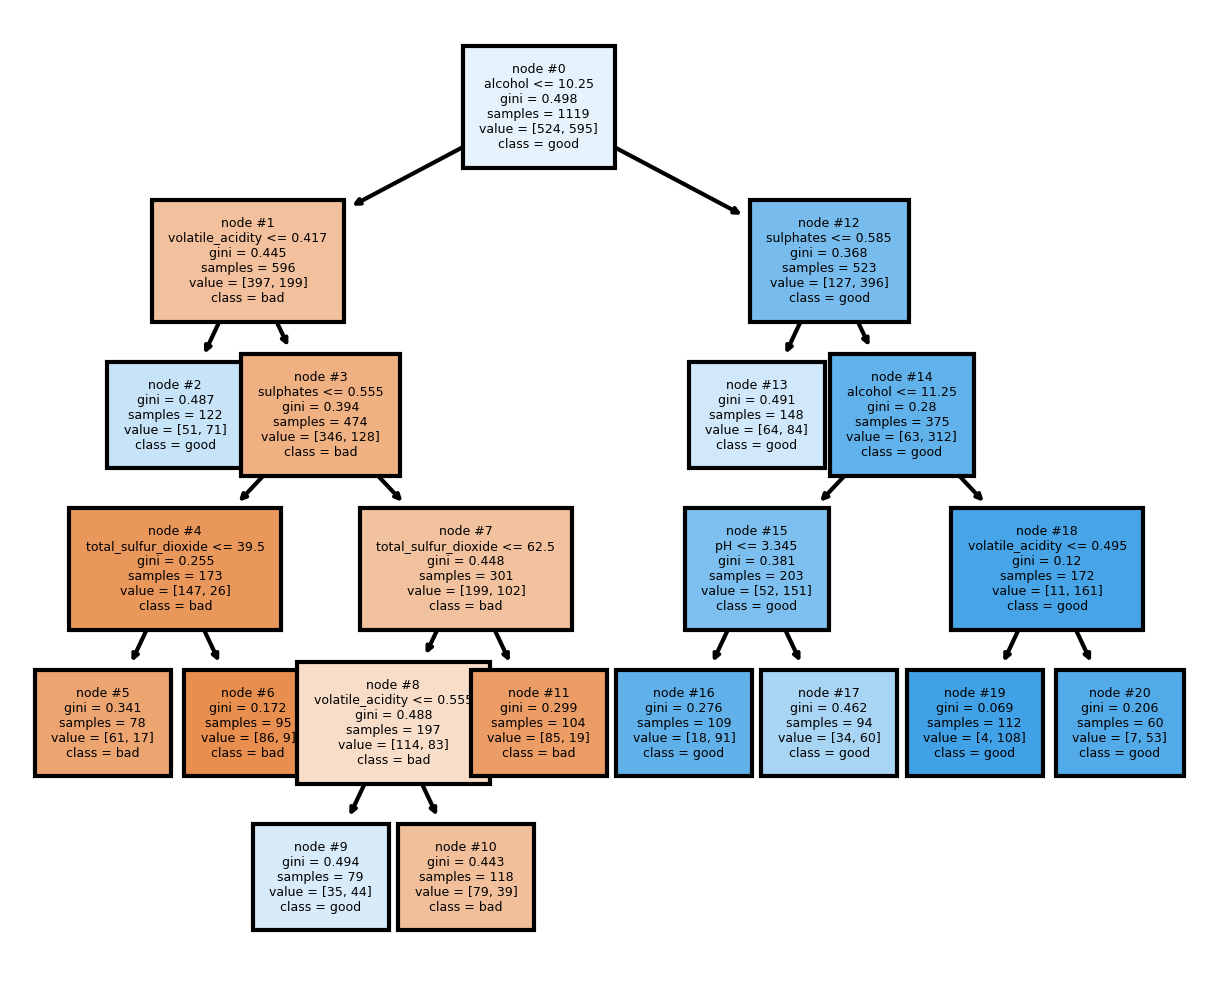

In [43]:
from sklearn import tree
import matplotlib.pyplot as plt

quality=['bad', 'good']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names = quality, # Yes , No
               filled = True, # colour
              node_ids = True, # node number
              fontsize = 3); # 
#fig.savefig('imagename.png')

### Strategy & Prediction

In [44]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,quality,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Predicted
851,0,9.3,0.430,0.44,1.9,0.085,9.0,22.0,0.99708,3.28,0.55,9.5,0
642,0,9.9,0.540,0.45,2.3,0.071,16.0,40.0,0.99910,3.39,0.62,9.4,1
1464,0,6.8,0.590,0.10,1.7,0.063,34.0,53.0,0.99580,3.41,0.67,9.7,0
1348,0,7.2,0.655,0.03,1.8,0.078,7.0,12.0,0.99587,3.34,0.39,9.5,0
724,0,7.5,1.115,0.10,3.1,0.086,5.0,12.0,0.99580,3.54,0.60,11.2,1


### Final accuracy of Model after Pruning

In [45]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['quality'])
print(matrix)

[[311  84]
 [213 511]]


In [46]:
Accuracy_Train=((311+511)/(1119)*100)
print(Accuracy_Train)

73.45844504021449


In [47]:
from sklearn.metrics import classification_report
print(classification_report(train['quality'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.79      0.59      0.68       524
           1       0.71      0.86      0.77       595

    accuracy                           0.73      1119
   macro avg       0.75      0.73      0.73      1119
weighted avg       0.74      0.73      0.73      1119



# Step 8 : Predictions on Test Dataset

In [48]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
446,12.5,0.38,0.60,2.6,0.081,31.0,72.0,0.9996,3.10,0.73,10.5,0
185,8.9,0.31,0.57,2.0,0.111,26.0,85.0,0.9971,3.26,0.53,9.7,0
455,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.9988,3.22,0.69,13.4,1
328,13.4,0.27,0.62,2.6,0.082,6.0,21.0,1.0002,3.16,0.67,9.7,1
1594,6.2,0.60,0.08,2.0,0.090,32.0,44.0,0.9949,3.45,0.58,10.5,0


In [49]:
test['Predicted']=dt.predict(X_test)
test.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Predicted
446,12.5,0.38,0.60,2.6,0.081,31.0,72.0,0.9996,3.10,0.73,10.5,0,1
185,8.9,0.31,0.57,2.0,0.111,26.0,85.0,0.9971,3.26,0.53,9.7,0,1
455,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.9988,3.22,0.69,13.4,1,1
328,13.4,0.27,0.62,2.6,0.082,6.0,21.0,1.0002,3.16,0.67,9.7,1,1
1594,6.2,0.60,0.08,2.0,0.090,32.0,44.0,0.9949,3.45,0.58,10.5,0,1


# Step 9 : Model Performance Metrics on Test data 

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['quality'])
print(confusion_matrix)

[[122  42]
 [ 98 218]]


In [51]:
158+88+62+172

480

In [57]:
Accuracy_test=((122+218)/(480)*100)
Accuracy_test

70.83333333333334

# Sensitivity & Specificity

### Train

In [53]:
from sklearn.metrics import classification_report
print(classification_report(train['quality'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.79      0.59      0.68       524
           1       0.71      0.86      0.77       595

    accuracy                           0.73      1119
   macro avg       0.75      0.73      0.73      1119
weighted avg       0.74      0.73      0.73      1119



### Test

In [54]:
from sklearn.metrics import classification_report
print(classification_report(test['quality'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.74      0.55      0.64       220
           1       0.69      0.84      0.76       260

    accuracy                           0.71       480
   macro avg       0.72      0.70      0.70       480
weighted avg       0.71      0.71      0.70       480



# Grid Search Method 

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = { 'min_samples_split': [300,150,250], ## Parent 
           'min_samples_leaf': [50,60,70], ## Child or Leave 
           'max_depth':[3,4,6]}  # Branches
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params, 
                              verbose=1, 
                              cv=10)
grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 6],
                         'min_samples_leaf': [50, 60, 70],
                         'min_samples_split': [300, 150, 250]},
             verbose=1)

In [56]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=60, min_samples_split=150,
                       random_state=42)